### START HERE IF SOURCING FROM df_manual_FOR_training
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


# Visualization


In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

if code_dir_name not in str(Path.cwd()).split('/')[-1]:
    for _ in range(5):

        parent_path = str(Path.cwd().parents[_]).split('/')[-1]

        if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

            code_dir = str(Path.cwd().parents[_])

            if code_dir is not None:
                break
else:
    code_dir = str(Path.cwd())
sys.path.append(code_dir)

# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module import researchpy_fork as rp # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from setup_module.statannotations_fork.Annotator import Annotator # type:ignore # isort:skip # fmt:skip # noqa # nopep8


/opt/homebrew/Caskroom/miniforge/base/envs/Automating_Equity1/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [3]:
try:
    df_sectors_all = pd.read_pickle(f'{table_save_path}Sectors Output from script.pkl')
except FileNotFoundError:
    cbs_notebook = '\\'.join(f'{scraped_data}CBS/CBS.ipynb')
    %run $cbs_notebook import df_sectors_all # type:ignore # isort:skip # fmt:skip # noqa # nopep8


# Analysis plan:

1. ## [Descriptives and tables](./1.%20descriptives_and_tables.ipynb)
2. ## [Visualization](./2.%20visualization.ipynb)
3. ## [Frequencies and Normality tests](./2.%20frequencies_and_normality_test.ipynb)
   1. ### Frequencies, histograms, and QQ plots
      * Normal test
      * Kurtosis test
      * Shapiro
      * Anderson
      * Bartlett
   2. ### Correlation between independent variables (IVs) and control variables and Multicolinarity test
      * Pearson's R
      * VIF
     - ***ivs_dummy*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
     - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
     - ***% Sector per Workforce*** (continous ratio) = Sector percentage per worksforce (0-100)
     - ***num_words*** (continous ratio) = Number of words in job description
     - ***English Requirement in Job Ad*** (binary nominal) = English requirement in job description (0 vs. 1)
     - ***Dutch Requirement in Job Ad*** (binary nominal) = Dutch requirement in job description (0 vs. 1)
     - ***Platform*** (binary dummy) = LinkedIn (0 vs. 1), Indeed (0 vs. 1), Glassdoor (0 vs. 1)

4. ## [ANOVA and Chi-square (Pearson's R)](./3.%20chisqt_and_anova.ipynb)

   1. ### Chi-square
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)

   2. ### One-way ANOVA, interactions, and post-hoc test
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
          - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
          - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test
      * **df_jobs:**
         - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
         - ***ivs*** (binary nominal) = Social category designation (Female, Male, Mixed Gender)
           - If Levene's test is *not significant*, use classic ANOVA and Tukey's post hoc test
           - If Levene's test is *significant*, use Welch's and Kruskal-Wallis ANOVA and Games Howell's post hoc test

5. ## [Regression Analysis](./3.%20regression_analysis.ipynb)
   1. ### Logistic Regression  with all interaction (smf):
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   3. ### Multilevel OLS Regression with all interaction:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)

6. ## [Specification Curve Analysis](./4.%20specification_curve_analysis.ipynb)

   1. ### Logistic Specification Curve Analysis:
      * **df_manual:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
      * **df_jobs:**
        - ***dvs*** (binary nominal) = 'Warmth' and 'Competence' (0 vs. 1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)
   2. ### OLS Specification Curve Analysis:
      * **df_jobs:**
        - ***dvs_prob*** (continous ratio) = 'Warmth' and 'Competence' probabilities (0-1)
        - ***ivs_perc*** (continous ratio) = Social category percentage per sector (0-100)


# Descriptives

### READ DATA

In [4]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_training.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')
df_manual = categorize_df_gender_age(df_manual)


Dataframe loaded with shape: (5947, 75)


In [5]:
with open(f'{data_dir}df_jobs_for_analysis_len.txt', 'r') as f:
    df_jobs_len = int(f.read())

df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_for_analysis.pkl')
assert len(df_jobs) == df_jobs_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_jobs_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_jobs.shape}')
df_jobs = categorize_df_gender_age(df_jobs)


Dataframe loaded with shape: (308583, 101)


In [6]:
dataframes = {
    'df_jobs': df_jobs,
    # 'df_manual': df_manual,
}


### All info

In [7]:
# All info
analysis_columns = [
    'Warmth',
    'Competence'
]

for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    df = categorize_df_gender_age(df)

    df.info()


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308583 entries, 0 to 308582
Columns: 101 entries, Search Keyword to Competence_Probability_predicted
dtypes: category(4), float64(64), int64(4), object(29)
memory usage: 229.5+ MB


# Plotting

## Age, Gender, Warmth, and Competence

In [8]:
# Ploting Warmth and Competence
def plot_warmth_comp(df_name, df):
    with open(f'{data_dir}{df_name}_all_imbalance_ratio_dict.json', 'r') as f:
        all_imbalance_ratio_dict = json.load(f)

    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    dfs_to_transpose = [
        df[dv]
        .value_counts(normalize=True)
        .mul(100)
        .round(3)
        .astype(float)
        .to_frame()
        .transpose()
        .set_index(pd.Index([dv]))
        for dv in dvs
    ]

    df_warm_comp_transposed = pd.concat(dfs_to_transpose)

    fig, ax = plt.subplots()
    ax.set_title(f'{title_prefix} Warmth and Competence Sentence Percentages')

    df_warm_comp_transposed.plot(
        kind='barh', legend=True, stacked=True, ax=ax, fill=False#, color=['C5', 'C0']
    )

    for i, container in enumerate(ax.containers):
        labels = [f'{width:.1f}%' for v in container if float(width := v.get_width())]
        ax.bar_label(container, labels=labels, label_type='center', color='black', weight='bold', fontsize=14)
        for bar in container:
            bar.set_hatch('\\' if i % 2 == 0 else '//')
            bar.set_alpha(0.5)
        ax.set_xlabel('Job Ad Sentences Percentages (%)')

    for i, tick_label in enumerate(ax.get_ymajorticklabels()):
        ax.annotate(
            f'IR for {tick_label.get_text()} = {all_imbalance_ratio_dict[f"{df_name} {tick_label.get_text()}"]:.2f}',
            xy=(48, 0.3+i), ha='center', va='center'
        )

    ax.legend(['Absent', 'Present'], fontsize='large')

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Warmth and Competence Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:20<00:00, 10.19s/it]


CPU times: user 17.7 s, sys: 1.27 s, total: 19 s
Wall time: 20.5 s


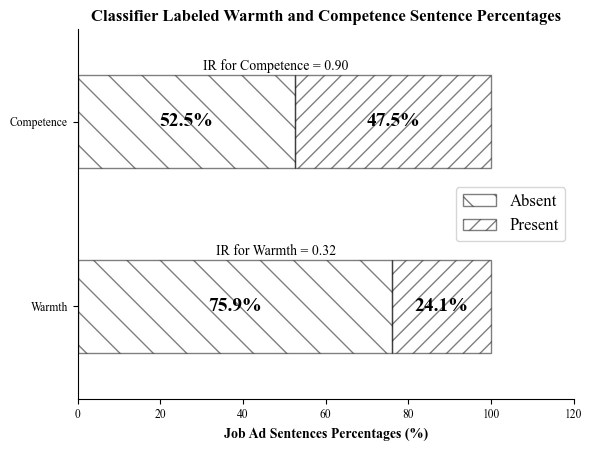

In [9]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_warmth_comp_interact(df_name):
        plot_warmth_comp(df_name, dataframes[df_name])
else:
    plot_warmth_comp(list(dataframes.keys())[0], list(dataframes.values())[0])


In [10]:
# Plotting imbalanced scatter plot
def plot_imbalanced_scatter(df_name, df):
    close_plots(plt)
    num_of_clusters = 2
    text_col = 'Job Description spacy_sentencized'

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    for dv in dvs:

        print(f'{"-"*20} {dv.upper()} {"-"*20}\n')
        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform(list(np.array(df[text_col][:5000].astype('str').values)))
        y = column_or_1d(df[dv][:5000].astype('int64').values.tolist(), warn=True)

        km = KMeans(
            n_clusters=num_of_clusters,
            init='k-means++',
            max_iter=500)
        km.fit(X)

        # First: for every document we get its corresponding cluster
        clusters = km.predict(X)

        # We train the PCA on the dense version of the tf-idf.
        pca = PCA(n_components=2)
        two_dim = pca.fit_transform(np.asarray(X.todense()))
        explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

        scatter_x = two_dim[:, 0] # first principle component
        scatter_y = two_dim[:, 1] # second principle component

        fig, ax = plt.subplots()
        fig.set_size_inches(20,10)
        fig.suptitle(f'{title_prefix} {dv} Sentence Clusters', fontsize=20)

        # group by clusters and scatter plot every cluster
        # with a colour and a label
        for group in np.unique(clusters):
            ix = np.where(clusters == group)
            ax.scatter(scatter_x[ix], scatter_y[ix], c={0: 'C0', 1: 'C5'}[group], label=group)

        ax.legend(title='Cluster')
        plt.xlabel('PCA 0')
        plt.ylabel('PCA 1')
        # plt.show()

        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

        terms = vectorizer.get_feature_names_out()
        for i in range(2):
            print(f'{"="*10}')
            print(f'Cluster {i}:')
            print(f'{"-"*10}')
            for ind in order_centroids[i, :10]:
                print(f' {terms[ind]}')
            print(f'{"="*10}')

        show_and_close_plots(plt)

        for image_save_format in tqdm.tqdm(['png', 'svg']):
            fig.savefig(
                shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} {dv} Sentence Clusters.{image_save_format}'),
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

-------------------- WARMTH --------------------

Cluster 0:
----------
 skills
 english
 excellent
 written
 communication
 fluent
 strong
 good
 language
 dutch
Cluster 1:
----------
 team
 experience
 work
 business
 working
 offer
 role
 management
 product
 looking


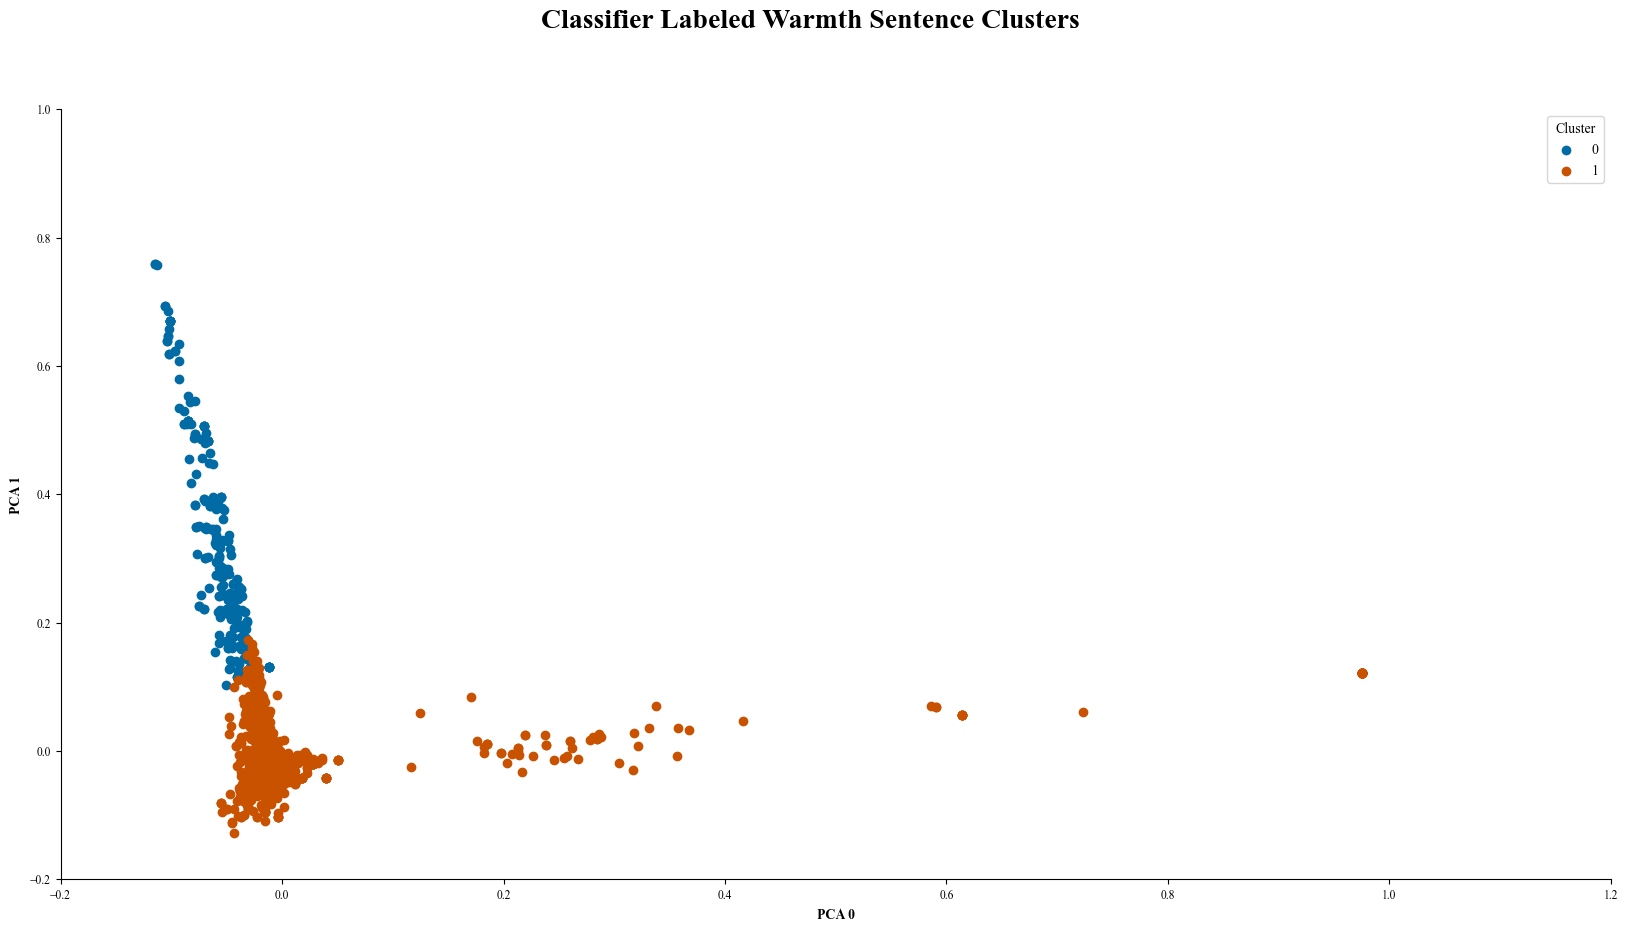

100%|██████████| 2/2 [01:51<00:00, 55.73s/it] 


-------------------- COMPETENCE --------------------

Cluster 0:
----------
 team
 experience
 work
 business
 working
 offer
 role
 management
 product
 looking
Cluster 1:
----------
 skills
 english
 excellent
 written
 communication
 fluent
 strong
 good
 language
 dutch


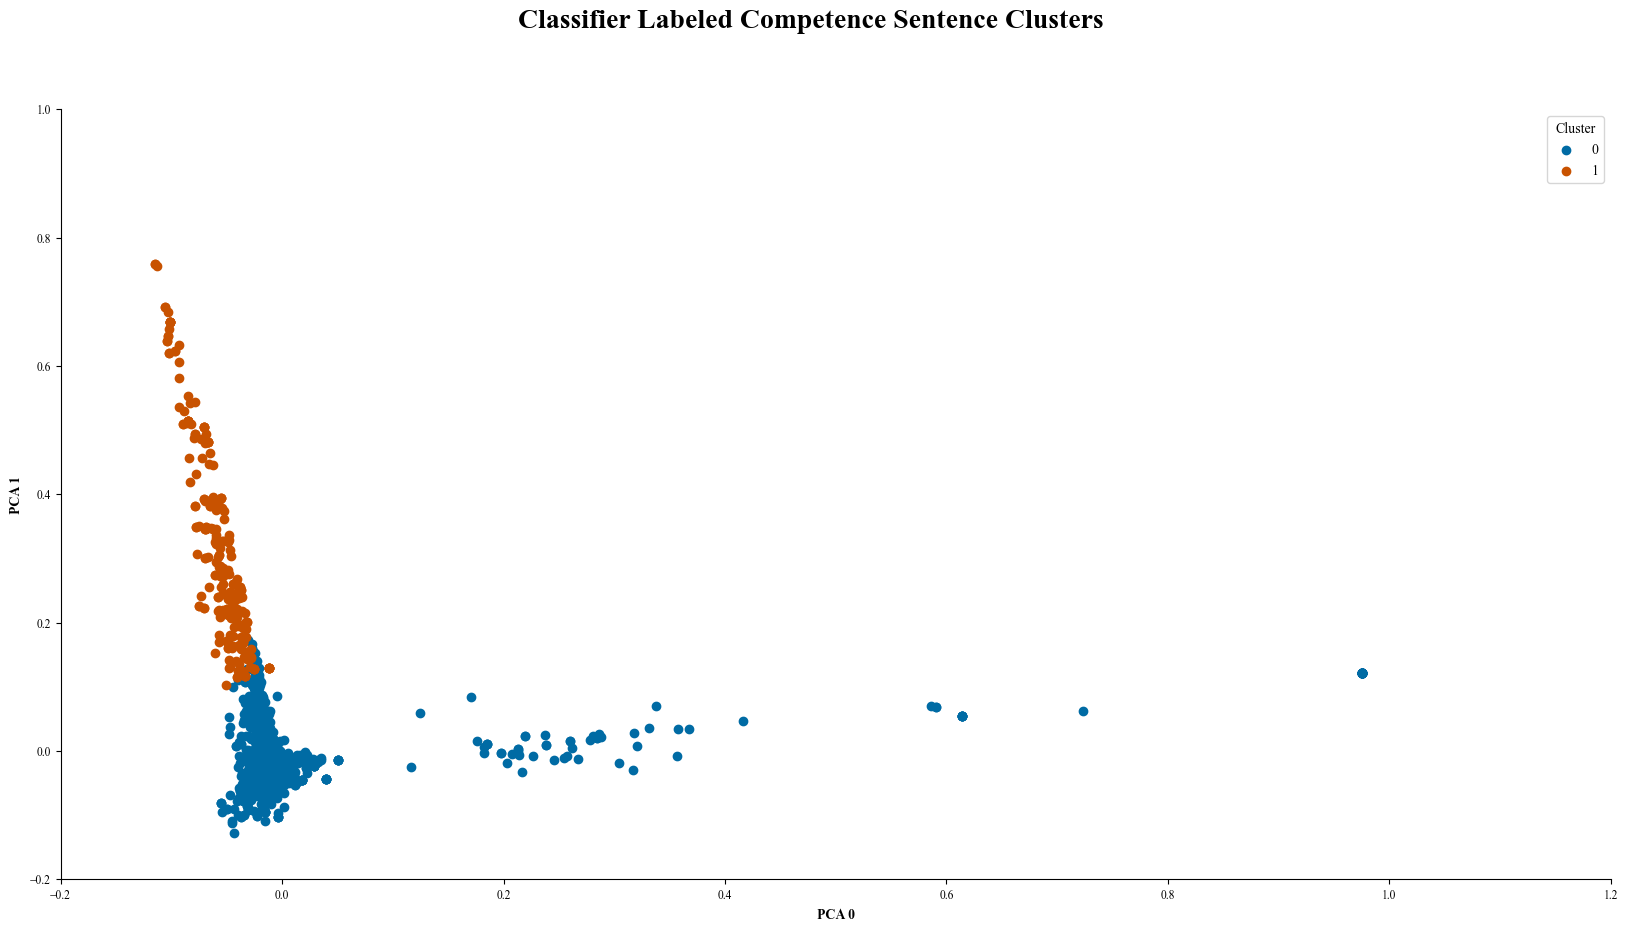

100%|██████████| 2/2 [01:38<00:00, 49.46s/it]

CPU times: user 3min 58s, sys: 18.1 s, total: 4min 16s
Wall time: 3min 44s


In [11]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_imbalanced_scatter_interact(df_name):
        plot_imbalanced_scatter(df_name, dataframes[df_name])
else:
    plot_imbalanced_scatter(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


In [12]:
# Ploting Categorical Gender and Age
def plot_ivs_cat(df_name, df):
    close_plots(plt)
    color_dict = {
        'Female': 'C5', 'Mixed Gender': 'C2', 'Male': 'C0',
        'Older': 'C5', 'Mixed Age': 'C2', 'Younger': 'C0'
    }
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    fig, axs = plt.subplots(1, 2)
    fig.suptitle(f'{title_prefix} Categorical Gender and Age Sentence Percentages')

    # Gender
    df_gender_transposed = df['Gender'].value_counts(normalize=True).mul(100).round(3).astype(float).to_frame().transpose().set_index(pd.Index(['Gender']))
    gender_colors = [color_dict[col] for col in df_gender_transposed.columns]
    df_gender_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[0], fill=False, #color=gender_colors
    )

    # Age
    df_age_transposed = df['Age'].value_counts(normalize=True).mul(100).round(3).astype(float).to_frame().transpose().set_index(pd.Index(['Age']))
    age_colors = [color_dict[col] for col in df_age_transposed.columns]
    df_age_transposed.plot(
        kind='bar', legend=True, stacked=True, ax=axs[1], fill=False, #color=age_colors
    )

    for ax in axs:
        ax.set_ylabel('Job Ad Sentences Percentages (%)')
        hatch_patterns = ['-', '\\\\', '//']
        for i, container in enumerate(ax.containers):
            labels = [f'{height:.1f}%' for v in container if float(height:= v.get_height())]
            ax.bar_label(container, labels=labels, label_type='center', color='black', weight='bold', fontsize=14)
            for bar in container:
                bar.set_hatch(hatch_patterns[i])
                bar.set_alpha(0.5)

        handles, labels = ax.get_legend_handles_labels()
        if df_name == 'df_manual':
            order = [2, 1, 0]if 'Older' in labels else [2, 0, 1]
        if df_name == 'df_jobs':
            order = [1, 0, 2] if 'Older' in labels else [2, 0, 1]
        ax.legend(handles=[handles[idx] for idx in order], labels=[labels[idx] for idx in order], loc='upper right', fontsize=8)

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - Categorical Gender and Age Sentences.{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:22<00:00, 11.26s/it]


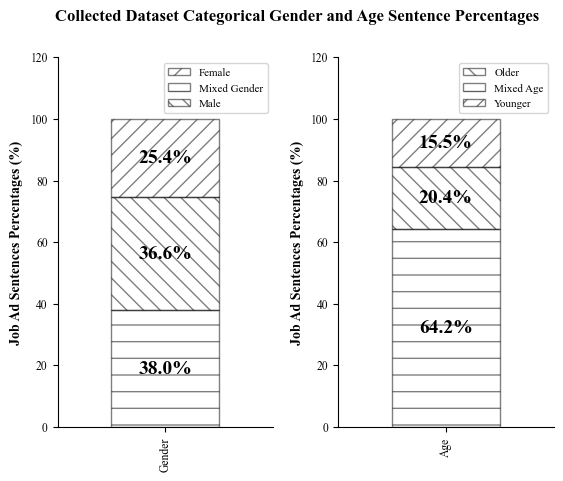

CPU times: user 18.4 s, sys: 1.24 s, total: 19.6 s
Wall time: 22.8 s


In [13]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_ivs_cat_interact(df_name):
        plot_ivs_cat(df_name, dataframes[df_name])
else:
    plot_ivs_cat(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


In [14]:
# Ploting Percentages of Gender and Age
def plot_iv_percs(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Continuous Gender and Age Sentence Percentages')

    sns.histplot(data=df[ivs_perc], palette='colorblind', kde=True, stat='density', multiple='dodge', ax=ax)
    plt.legend(title='Social Category of Sector', loc='upper left', labels=['Female', 'Male', 'Older', 'Younger'], fontsize=8, title_fontsize=8, bbox_to_anchor=(0, 1))
    ax.set_xlabel('Percentage per Workforce (%)')

    fig.tight_layout()

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - Continuous Gender and Age Sentences.{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:20<00:00, 10.21s/it]


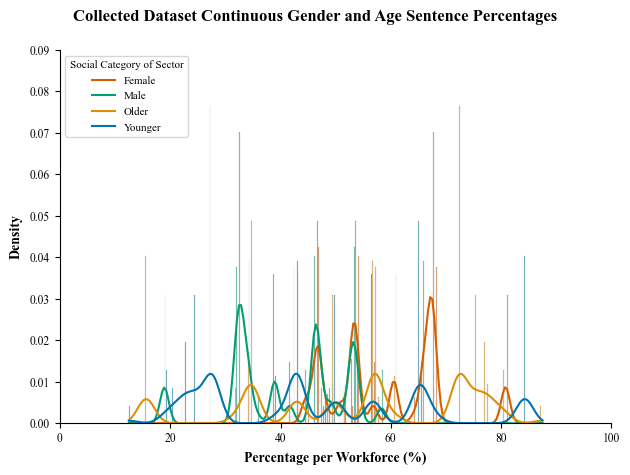

CPU times: user 25.3 s, sys: 2.37 s, total: 27.6 s
Wall time: 24.2 s


In [15]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_iv_percs_interact(df_name):
        plot_iv_percs(df_name, dataframes[df_name])
else:
    plot_iv_percs(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


In [16]:
# Ploting Percentages of Gender and Age
def plot_dvs_actual_and_predicted(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

    for dv in dvs:
        if df_name == 'df_manual':
            dv_1 = dv
            if all(col in df.columns for col in dvs_predicted):
                drop_subset = dvs_predicted
                dv_2 = f'{dv}_predicted'
            else:
                drop_subset = dvs
        elif df_name == 'df_jobs':
            dv_1 = f'{dv}_actual'
            dv_2 = f'{dv}_predicted'
            drop_subset = dvs_predicted
        fig, ax = plt.subplots()
        fig.suptitle(f'{title_prefix} Density Distributions of Human-labeled and Classifier-labeled {dv}-related Sentences')

        sns.kdeplot(data=df.dropna(subset=drop_subset), x=dv_1, linestyle='--', label=f'Human-labeled', color='black', ax=ax)
        if all(col in df.columns for col in dvs_predicted):
            sns.kdeplot(data=df.dropna(subset=drop_subset), x=dv_2, linestyle='-', label=f'Classifier-labeled', color='gray', ax=ax)

        plt.legend(loc='upper left', labels=[f'Human-labeled {dv}', f'Classifier-labeled {dv}'], fontsize=8, title_fontsize=8, bbox_to_anchor=(0, 1))
        ax.set_xlabel(dv)

        fig.tight_layout()

        for image_save_format in tqdm.tqdm(['png', 'svg']):
            fig.savefig(
                shorten_file_path(f'{plot_save_path}{df_name} - Density Distributions of Human-labeled and Classifier-labeled {dv}.{image_save_format}'),
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        show_and_close_plots(plt)

    if df_name == 'df_jobs':
        for dv in dvs_prob:
            fig, ax = plt.subplots()
            fig.suptitle(f'{title_prefix} Density Distributions of Human-labeled and Classifier-labeled {dv} Probabilities Sentences')

            sns.kdeplot(data=df.dropna(subset=dvs_predicted), x=dv, linestyle='--', label=f'Human-labeled', color='black', ax=ax)
            sns.kdeplot(data=df.dropna(subset=dvs_predicted), x=f'{dv}_predicted', linestyle='-', label=f'Classifier-labeled', color='gray', ax=ax)

            plt.legend(loc='upper left', labels=[f'Human-labeled {dv}', f'Classifier-labeled {dv}'], fontsize=8, title_fontsize=8, bbox_to_anchor=(0, 1))
            ax.set_xlabel(dv)

            fig.tight_layout()

            for image_save_format in tqdm.tqdm(['png', 'svg']):
                fig.savefig(
                    shorten_file_path(f'{plot_save_path}{df_name} - Density Distributions of Human-labeled and Classifier-labeled {dv} Probabilities.{image_save_format}'),
                    format=image_save_format, dpi=3000, bbox_inches='tight'
                )
            show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:26<00:00, 13.28s/it]


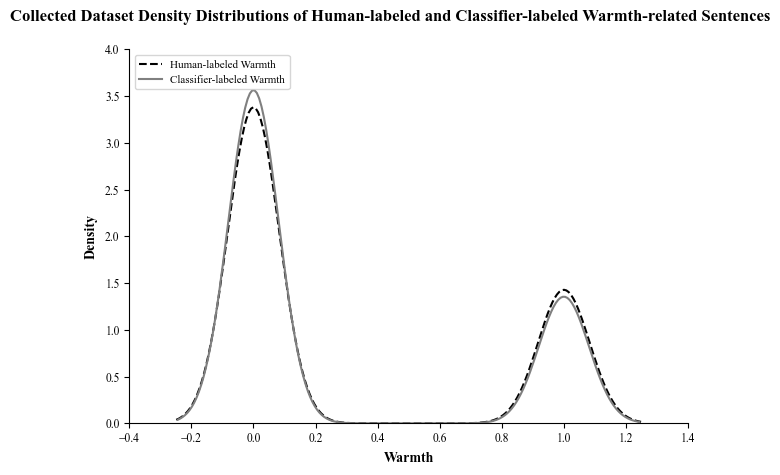

100%|██████████| 2/2 [00:28<00:00, 14.05s/it]


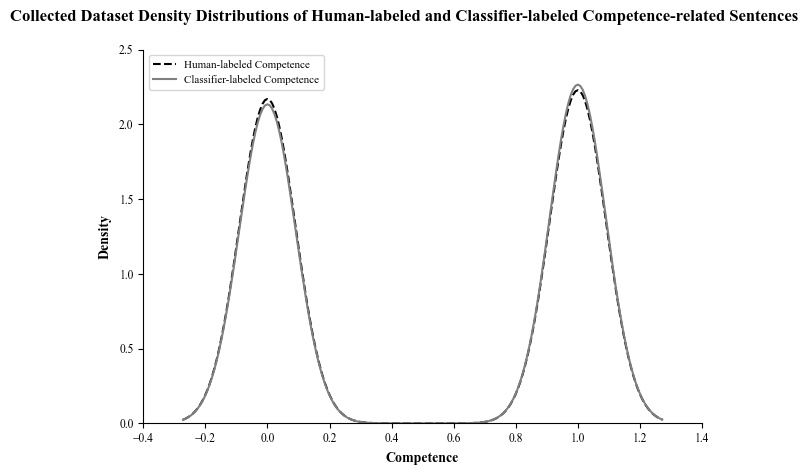

100%|██████████| 2/2 [00:28<00:00, 14.43s/it]


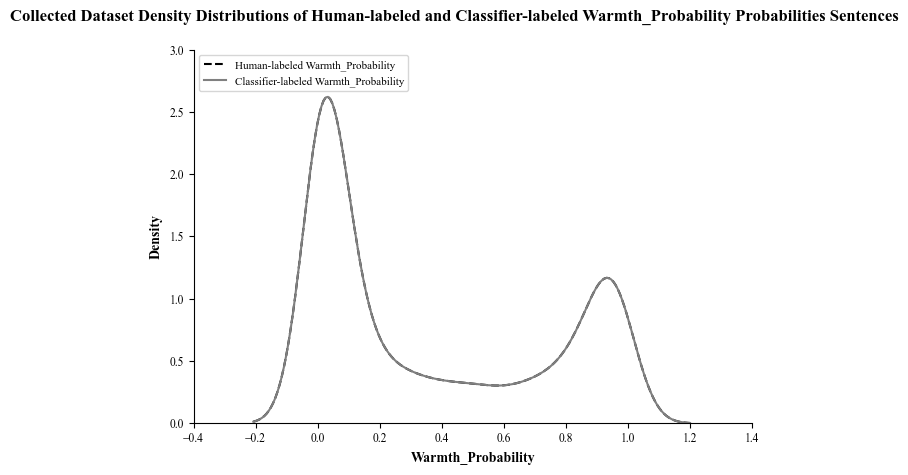

100%|██████████| 2/2 [00:30<00:00, 15.42s/it]


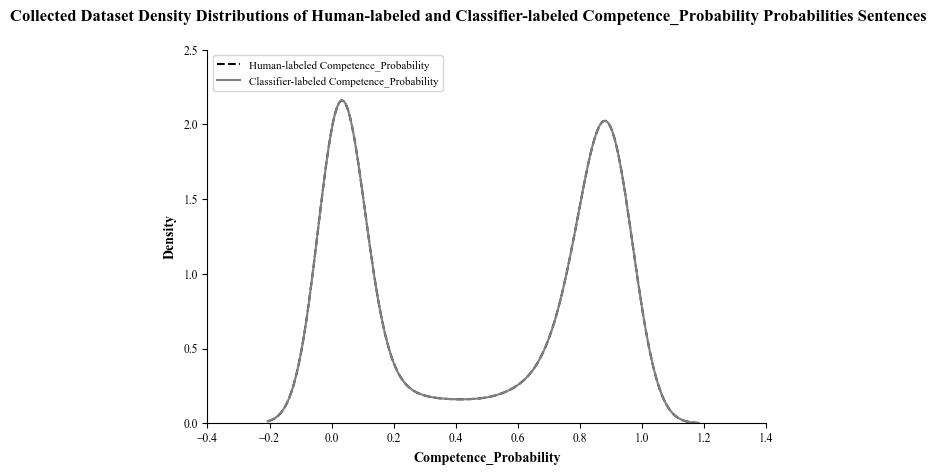

CPU times: user 1min 44s, sys: 6.58 s, total: 1min 51s
Wall time: 1min 55s


In [17]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_dvs_actual_and_predicted_interact(df_name):
        plot_dvs_actual_and_predicted(df_name, dataframes[df_name])
else:
    plot_dvs_actual_and_predicted(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


In [18]:
# Make stacked barplots with percentages
def plot_stacked_barplots(df_name, df, dvs=dvs):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    for iv in tqdm.tqdm(['Gender', 'Age', 'Sector']):
        fig, ax = plt.subplots()
        fig.suptitle(f'{title_prefix} Warmth and Competence Sentence Percentages per {iv}')

        try:
            vars_list = [iv, *dvs]
            df_pivot = df[
                vars_list
            ].pivot_table(
                index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
            )
        except KeyError:
            from setup_module.imports import dvs
            vars_list = [iv, *dvs]
            df_pivot = df[
                vars_list
            ].pivot_table(
                index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
            )

        df_pivot.sort_values(by=iv, ascending=False).plot(
            kind='barh', legend=True, stacked=True, ax=ax, fill=False, #color=['C0', 'C5']
        )

        ax.legend(dvs, fontsize=14)

        for i, container in enumerate(ax.containers):
            labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
            if iv != 'Sector':
                ax.bar_label(container, labels=labels, label_type='center', color='black', weight='bold', fontsize=10)
            ax.set_xlabel('Job Ad Sentences Percentages (%)')
            ax.set_ylabel(iv)
            for bar in container:
                bar.set_hatch('\\' if i % 2 == 0 else '//')
                bar.set_alpha(0.5)
            ax.legend(loc='upper right', fontsize=10)

        for image_save_format in tqdm.tqdm(['png', 'svg']):
            fig.savefig(
                shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Barplot - {iv} x {dvs[0]} and {dvs[1]} Sentences.{image_save_format}'),
                format=image_save_format, dpi=3000, bbox_inches='tight'
            )
        show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:19<00:00,  9.51s/it]


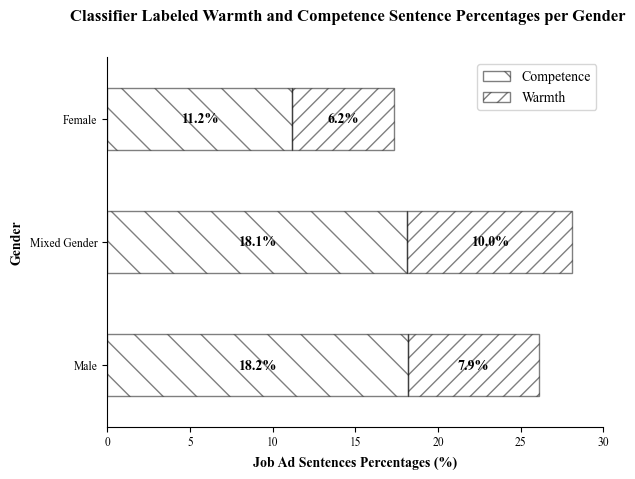

100%|██████████| 2/2 [00:19<00:00,  9.84s/it]


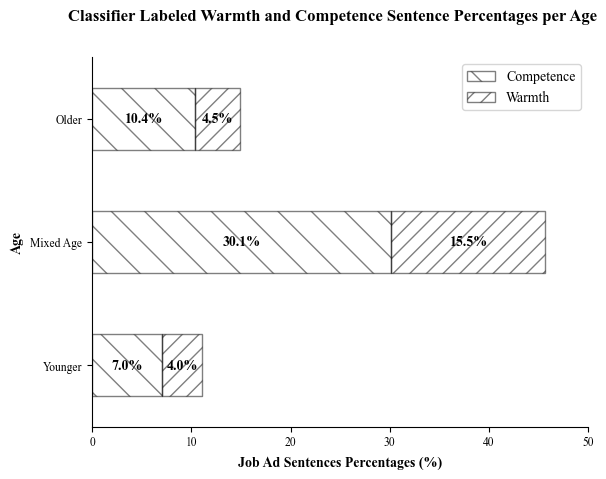

100%|██████████| 2/2 [00:21<00:00, 10.96s/it]


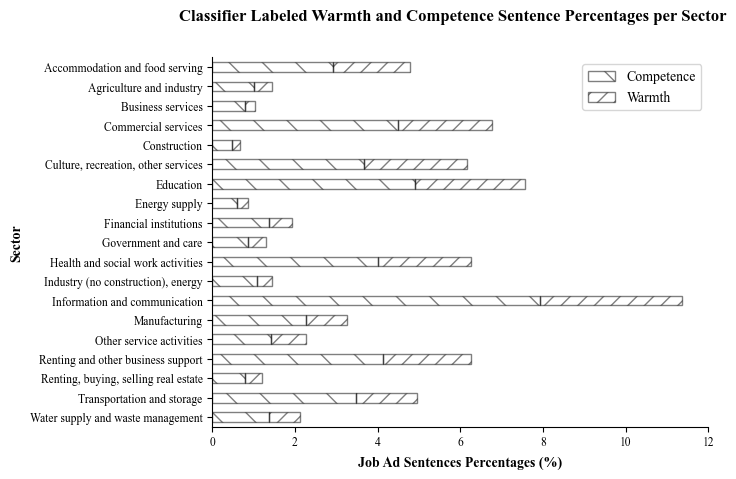

100%|██████████| 3/3 [01:01<00:00, 20.35s/it]

CPU times: user 55.6 s, sys: 3.14 s, total: 58.8 s
Wall time: 1min 1s


In [19]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_stacked_barplots_interact(df_name):
        plot_stacked_barplots(df_name, dataframes[df_name])
else:
    plot_stacked_barplots(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


In [20]:
def make_2ax_lineplot(df, df_name, ivs_cat_and_perc, dvs_all, fig, axs, colors_dict=None, linestyle_dict=None, line_plots=None):

    if colors_dict is None:
        colors_dict = {
            'Warmth': 'C5',
            'Competence': 'C0',
            'Warmth_Probability': 'C5',
            'Competence_Probability': 'C0',
        }
    if linestyle_dict is None:
        linestyle_dict = {
            'Warmth': '-',
            'Competence': '--',
            'Warmth_Probability': '-',
            'Competence_Probability': '--',
        }

    if line_plots is None:
        line_plots = []

    if df_name == 'df_manual':
        for r, c in tqdm_product([1], range(2)):
            fig.delaxes(axs[r, c])

    for dv, iv in tqdm_product(dvs_all[:2], ivs_cat_and_perc[:2]):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ = {
            'data': data,
            #'color': colors_dict[dv],
            'color': 'black',
            'linestyle': linestyle_dict[dv],
            'marker': 'o',
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0,
                0 if iv == ivs_cat_and_perc[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=10, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if iv == ivs_cat_and_perc[1]:
            handles = [
                mpl.lines.Line2D(
                    [], [], linestyle=linestyle_dict[dv], color='black',#color=colors_dict[dv]
                )
                for dv in dvs_all
            ]
            labels = dvs_all[:2]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.5, 0.9))

        line_plots.append(line_plot)

    if df_name == 'df_jobs':
        for dv, iv in tqdm_product(dvs_all[2:], ivs_cat_and_perc[:2]):
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ = {
                'data': data,
                # 'color': colors_dict[dv],
                'color': 'black',
                'linestyle': linestyle_dict[dv],
                'marker': 'o',
                'seed': random_state,
                'estimator': 'mean',
                'ax': axs[
                    1,
                    0 if iv == ivs_cat_and_perc[0] else 1,
                ],
            }
            line_plot = sns.lineplot(**params)

            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=10, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Means', fontsize=9)

            if iv == ivs_cat_and_perc[1]:
                handles = [
                    mpl.lines.Line2D(
                        [], [],linestyle=linestyle_dict[dv], color='black', #color=colors_dict[dv],
                    )
                    for dv in dvs_all
                ]
                labels = [
                    f'{dv.split("_")[0]} Prob.'
                    if '_' in dv
                    else dv
                    for dv in dvs_all[2:]
                ]
                line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.55, 0.8))

            line_plots.append(line_plot)

    return line_plots


In [21]:
# Make line plots 2 ax
def plot_lineplots_2ax(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled Probabilities of'

    fig, axs = plt.subplots(2, 2)
    fig.suptitle(f'{title_prefix} Warmth and Competence x Gender and Age')

    line_plots = make_2ax_lineplot(df, df_name, ivs_cat_and_perc, dvs_all, fig, axs)

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax).{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:19<00:00,  9.99s/it]


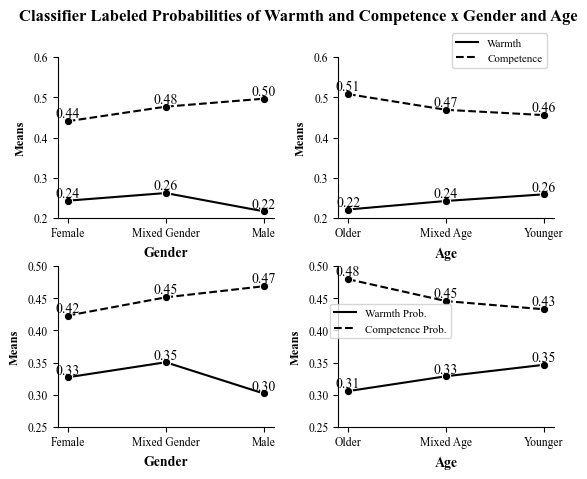

CPU times: user 18.8 s, sys: 1.08 s, total: 19.9 s
Wall time: 20.6 s


In [22]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_lineplots_2ax_interact(df_name):
        plot_lineplots_2ax(df_name, dataframes[df_name])
else:
    plot_lineplots_2ax(list(dataframes.keys())[0], list(dataframes.values())[0])


In [23]:
def make_df_jobs_2ax_lineplot(df, ivs_, dvs_, colors_dict=None, linestyle_dict=None):

    if colors_dict is None:
        colors_dict = {
            'Warmth': 'C5',
            'Competence': 'C0',
            'Warmth_Probability': 'C5',
            'Competence_Probability': 'C0',
        }
    if linestyle_dict is None:
        linestyle_dict = {
            'Warmth': '-',
            'Competence': '--',
            'Warmth_Probability': '-',
            'Competence_Probability': '--',
        }

    for iv, dv in tqdm_product(ivs_[:2], dvs_[:2]):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ = {
            'data': data,
            # 'color': colors_dict[dv],
            'color': 'black',
            'linestyle': linestyle_dict[dv],
            'marker': 'o',
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0 if iv == ivs_[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=10, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if iv == ivs_[1]:
            handles = [
                mpl.lines.Line2D(
                    [], [], linestyle=linestyle_dict[dv], color='black', #color=colors_dict[dv]
                )
                for dv in dvs_
            ]
            labels = [
                f'{dv.split("_")[0]} Prob.'
                if '_' in dv
                else dv
                for dv in dvs_
            ]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, loc='best')

    return line_plot


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:12<00:00,  6.13s/it]


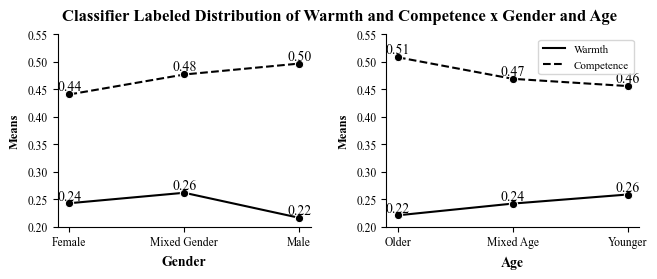

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:11<00:00,  5.84s/it]


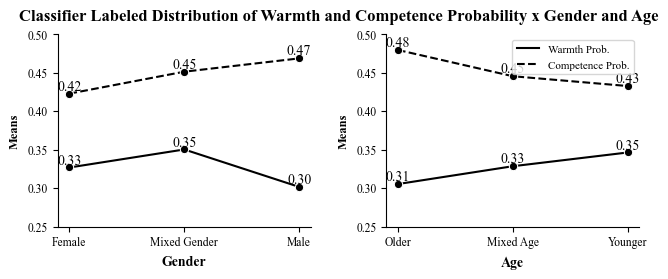

In [24]:
# Make df_jobs warmth and competence separate violin plots
close_plots(plt)

print(f'{"+"*20} DF_JOBS {"+"*20}\n')

title_prefix = 'Classifier Labeled'

# Warmth and Competence
fig, axs = plt.subplots(1, 2, figsize=(7.5, 2.5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

cat_line_plot = make_df_jobs_2ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[:2])
fig = cat_line_plot.get_figure()

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax) - Warmth Categorical.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)

close_plots(plt)

# Warmth and Competence Probability
fig, axs = plt.subplots(1, 2, figsize=(7.5, 2.5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence Probability x Gender and Age')

prob_line_plot = make_df_jobs_2ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[2:])
fig = prob_line_plot.get_figure()

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Line Plot (2 ax) - Warmth Probability.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)


In [25]:
def make_4ax_lineplot(df, ivs_cat_and_perc, dvs_all, axs, colors_dict=None, linestyle_dict=None, line_plots=None):

    if colors_dict is None:
        colors_dict = {
            'Warmth': 'C5',
            'Competence': 'C0',
            'Warmth_Probability': 'C5',
            'Competence_Probability': 'C0',
        }
    if linestyle_dict is None:
        linestyle_dict = {
            'Warmth': '-',
            'Competence': '--',
            'Warmth_Probability': '-',
            'Competence_Probability': '--',
        }

    if line_plots is None:
        line_plots = []

    if df_name == 'df_manual':
        for r, c in tqdm_product(range(2, 4), range(2)):
            fig.delaxes(axs[r, c])

    for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ = {
            'data': data,
            # 'color': colors_dict[dv],
            'color': 'black',
            'linestyle': linestyle_dict[dv],
            'marker': 'o',
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0 if iv == ivs_cat_and_perc[0] else 1,
                0 if dv == dvs_all[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=10, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if dv == dvs_all[1] and iv == ivs_cat_and_perc[0]:
            handles = [
                mpl.lines.Line2D(
                    [], [], linestyle=linestyle_dict[dv], color='black', #color=colors_dict[dv]
                )
                for dv in dvs_all
            ]
            labels = dvs_all[:2]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.65, 0.8))

        line_plots.append(line_plot)

    if df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ = {
                'data': data,
                # 'color': colors_dict[dv],
                'color': 'black',
                'linestyle': linestyle_dict[dv],
                'marker': 'o',
                'seed': random_state,
                'estimator': 'mean',
                'ax': axs[
                    2 if iv == ivs_cat_and_perc[0] else 3,
                    0 if dv == dvs_all[2] else 1,
                ],
            }
            line_plot = sns.lineplot(**params)

            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=10, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Means', fontsize=9)

            if dv == dvs_all[3] and iv == ivs_cat_and_perc[0]:
                handles = [
                    mpl.lines.Line2D(
                        [], [], linestyle=linestyle_dict[dv], color='black' #color=colors_dict[dv]
                    )
                    for dv in dvs_all
                ]
                labels = [
                    f'{dv.split("_")[0]} Prob.'
                    if '_' in dv
                    else dv
                    for dv in dvs_all[2:]
                ]
                line_plot.legend(handles=handles, labels=labels, fontsize=8, bbox_to_anchor=(0.35, 0.5))

            line_plots.append(line_plot)

    return line_plots


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:26<00:00, 13.34s/it]


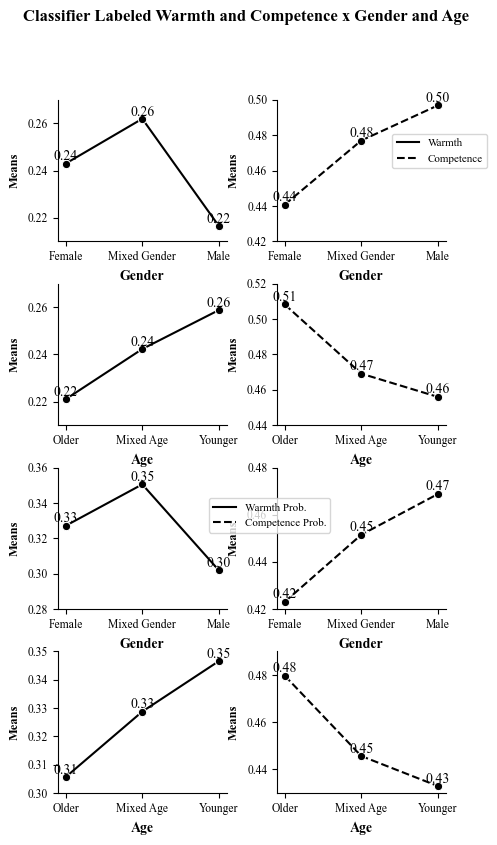

In [26]:
# Make line plots 4 ax
for df_name, df in dataframes.items():
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    fig, axs = plt.subplots(4, 2, figsize=(5, 9))
    fig.suptitle(f'{title_prefix} Warmth and Competence x Gender and Age')

    line_plots = make_4ax_lineplot(df, ivs_cat_and_perc, dvs_all, axs)

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax).{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


In [27]:
def make_df_jobs_4ax_lineplot(df, ivs_, dvs_, colors_dict=None, linestyle_dict=None):

    if colors_dict is None:
        colors_dict = {
            'Warmth': 'C5',
            'Competence': 'C0',
            'Warmth_Probability': 'C5',
            'Competence_Probability': 'C0',
        }
    if linestyle_dict is None:
        linestyle_dict = {
            'Warmth': '-',
            'Competence': '--',
            'Warmth_Probability': '-',
            'Competence_Probability': '--',
        }

    for iv, dv in tqdm_product(ivs_, dvs_):
        data = df.groupby(iv)[dv].agg('mean').astype(float)
        params = params_ = {
            'data': data,
            # 'color': colors_dict[dv],
            'color': 'black',
            'linestyle': linestyle_dict[dv],
            'marker': 'o',
            'seed': random_state,
            'estimator': 'mean',
            'ax': axs[
                0 if iv == ivs_[0] else 1,
                0 if dv == dvs_[0] else 1,
            ],
        }
        line_plot = sns.lineplot(**params)

        # Set labels and legend
        for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
            offset = (0, var_value + var_value/30)
            line_plot.annotate(
                f'{var_value:.2f}',
                xy=(var_name, var_value),
                fontsize=10, ha='center', va='bottom',
                xytext=offset, textcoords='offset points'
            )
        line_plot.set_ylabel('Means', fontsize=9)

        if dv == dvs_[1] and iv == ivs_[0]:
            handles = [
                mpl.lines.Line2D(
                    [], [], linestyle=linestyle_dict[dv], color='black', #color=colors_dict[dv]
                )
                for dv in dvs_
            ]
            labels = [
                f'{dv.split("_")[0]} Prob.'
                if '_' in dv
                else dv
                for dv in dvs_
            ]
            line_plot.legend(handles=handles, labels=labels, fontsize=8, loc='best')

    return line_plot


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:19<00:00,  9.90s/it]


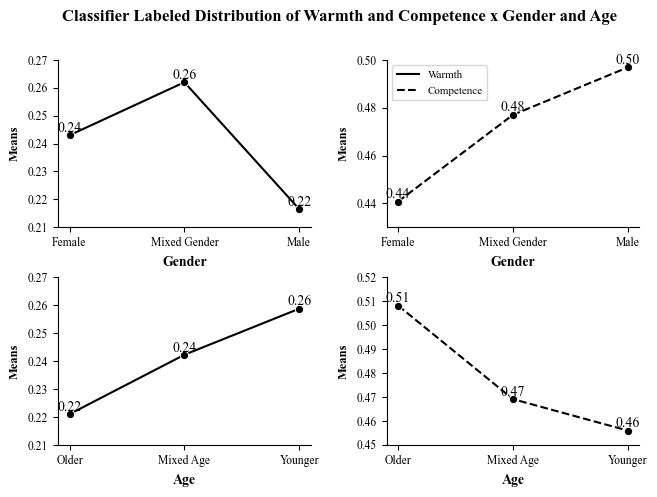

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:19<00:00,  9.76s/it]


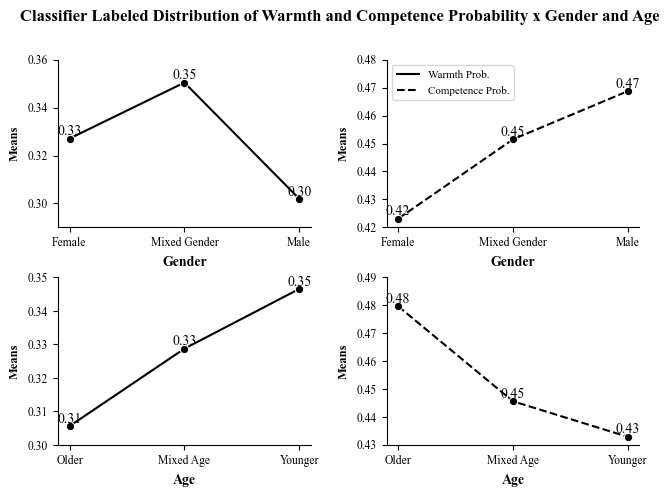

In [28]:
# Make df_jobs warmth and competence separate line plots
close_plots(plt)

print(f'{"+"*20} DF_JOBS {"+"*20}\n')

title_prefix = 'Classifier Labeled'

# Warmth and Competence
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

cat_line_plot = make_df_jobs_4ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[:2])
fig = cat_line_plot.get_figure()

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax) - Warmth Categorical.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)

close_plots(plt)

# Warmth and Competence Probability
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence Probability x Gender and Age')

prob_line_plot = make_df_jobs_4ax_lineplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[2:])
fig = prob_line_plot.get_figure()

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Line Plot (4 ax) - Warmth Probability.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)


In [29]:
def make_violinplot(df, df_name, ivs_cat_and_perc, dvs_all, fig, axs, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C5', 'C2', 'C0']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    if df_name == 'df_manual':
        for r, c in tqdm_product(range(2, 4), range(2)):
            fig.delaxes(axs[r, c])

    for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[:2]):
        pairs = [
            cat
            for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
            if cat[0] != cat[1]
        ]
        params = params_ | {
            'x': iv,
            'y': dv,
            'ax': axs[
                0 if iv == ivs_cat_and_perc[0] else 1,
                0 if dv == dvs_all[0] else 1,
            ],
        }
        violin_plot = sns.violinplot(**params)
        violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
        params_annotator = params | {
            'pairs': list({*map(tuple, map(sorted, pairs))})
        }
        annotator = Annotator(**params_annotator)
        annotator.configure(**configs)
        annotator.apply_and_annotate()

    if df_name == 'df_jobs':
        for iv, dv in tqdm_product(ivs_cat_and_perc[:2], dvs_all[2:]):
            pairs = [
                cat
                for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
                if cat[0] != cat[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    2 if iv == ivs_cat_and_perc[0] else 3,
                    0 if dv == dvs_all[2] else 1,
                ],
            }
            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
            params_annotator = params | {
            'pairs': list({*map(tuple, map(sorted, pairs))})
            }
            annotator = Annotator(**params_annotator)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    return violin_plot


In [30]:
# Make violin plots
def plot_violinplots(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    fig, axs = plt.subplots(4, 2, figsize=(6, 12.5))
    fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

    violin_plot = make_violinplot(df, df_name, ivs_cat_and_perc, dvs_all, fig, axs)

    fig = violin_plot.get_figure()

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Violin Plot.{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:5.938e-21 t=-9.507e+00
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:2.938e-144 t=2.564e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.882e-41 t=1.350e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:1.186e-55 t=-1.579e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.591e-21 t=-9.534e+00
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.771e-129 t=-2.423e+01
Older vs. Mixed Age: Welch's t-test independent samples with Bonferroni correction, P_val:3.109e-28 t=-1.112e+01
Mixed Age vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:3.430e-13 t=-7.425e+00
Older vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:2.

  0%|          | 0/4 [00:00<?, ?it/s]

Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:2.143e-42 t=-1.373e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.427e-223 t=3.199e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.160e-49 t=1.489e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:1.178e-59 t=-1.636e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.791e-27 t=-1.096e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.150e-149 t=-2.608e+01
Older vs. Mixed Age: Welch's t-test independent samples with Bonferroni correction, P_val:5.023e-44 t=-1.400e+01
Mixed Age vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:1.018e-20 t=-9.453e+00
Older vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:2.

100%|██████████| 2/2 [00:38<00:00, 19.10s/it]


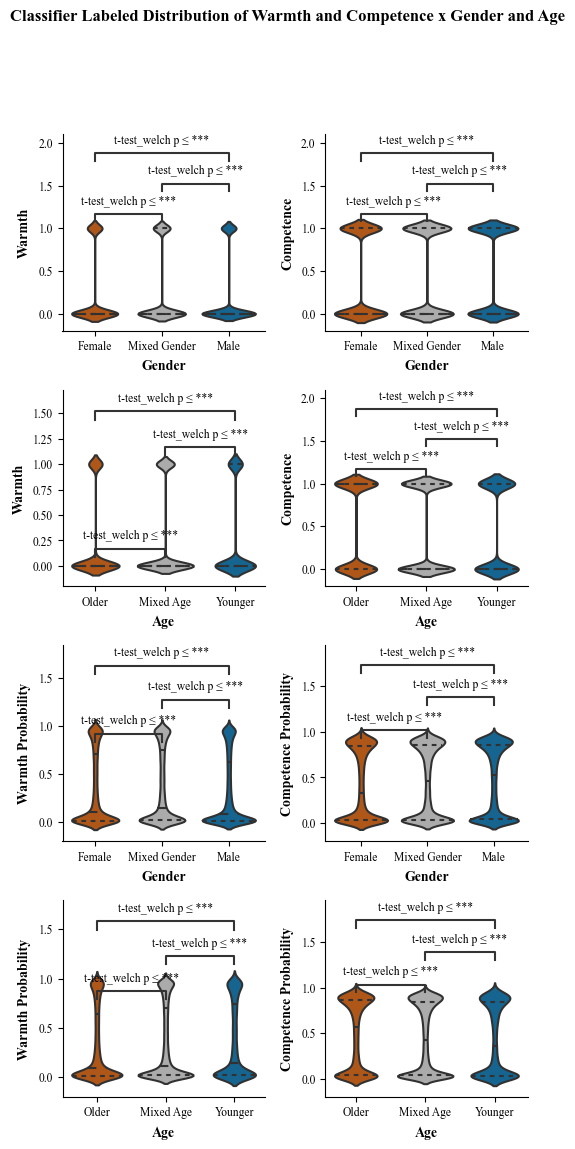

CPU times: user 1min 2s, sys: 10.7 s, total: 1min 13s
Wall time: 44.4 s


In [31]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_violinplots_interact(df_name):
        plot_violinplots(df_name, dataframes[df_name])
else:
    plot_violinplots(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


In [32]:
def make_df_jobs_violinplot(df, ivs_, dvs_, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C5', 'C2', 'C0']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    for iv, dv in tqdm_product(ivs_, dvs_):
        pairs = [
            cat
            for cat in itertools.product(ivs_dict[iv], ivs_dict[iv])
            if cat[0] != cat[1]
        ]
        params = params_ | {
            'x': iv,
            'y': dv,
            'ax': axs[
                0 if iv == ivs_[0] else 1,
                0 if dv == dvs_[0] else 1,
            ],
            'pairs': list({*map(tuple, map(sorted, pairs))})

        }
        violin_plot = sns.violinplot(**params)
        violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
        annotator = Annotator(**params)
        annotator.configure(**configs)
        annotator.apply_and_annotate()

    return violin_plot


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



  0%|          | 0/4 [00:00<?, ?it/s]

Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:5.938e-21 t=-9.507e+00
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:2.938e-144 t=2.564e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.882e-41 t=1.350e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:1.186e-55 t=-1.579e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.591e-21 t=-9.534e+00
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.771e-129 t=-2.423e+01
Older vs. Mixed Age: Welch's t-test independent samples with Bonferroni correction, P_val:3.109e-28 t=-1.112e+01
Mixed Age vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:3.430e-13 t=-7.425e+00
Older vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:2.

100%|██████████| 2/2 [00:18<00:00,  9.16s/it]


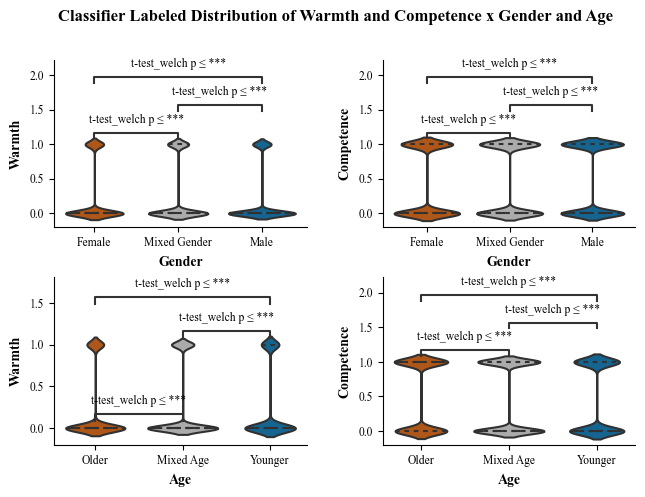

  0%|          | 0/4 [00:00<?, ?it/s]

Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:2.143e-42 t=-1.373e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.427e-223 t=3.199e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.160e-49 t=1.489e+01
Female vs. Mixed Gender: Welch's t-test independent samples with Bonferroni correction, P_val:1.178e-59 t=-1.636e+01
Mixed Gender vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:1.791e-27 t=-1.096e+01
Female vs. Male: Welch's t-test independent samples with Bonferroni correction, P_val:4.150e-149 t=-2.608e+01
Older vs. Mixed Age: Welch's t-test independent samples with Bonferroni correction, P_val:5.023e-44 t=-1.400e+01
Mixed Age vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:1.018e-20 t=-9.453e+00
Older vs. Younger: Welch's t-test independent samples with Bonferroni correction, P_val:2.

100%|██████████| 2/2 [00:19<00:00,  9.92s/it]


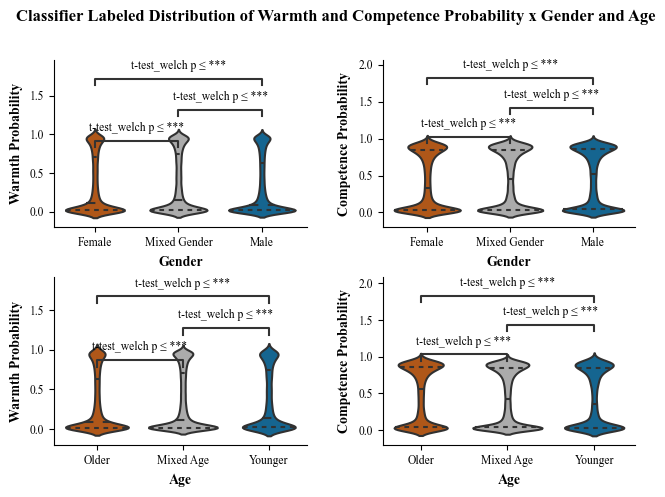

In [33]:
# Make df_jobs warmth and competence separate violin plots
close_plots(plt)
print(f'{"+"*20} DF_JOBS {"+"*20}\n')

title_prefix = 'Classifier Labeled'

# Warmth and Competence
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x Gender and Age')

cat_violin_plot = make_df_jobs_violinplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[:2])
fig = cat_violin_plot.get_figure()

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Violin Plot - Warmth Categorical.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)

close_plots(plt)

# Warmth and Competence Probability
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5))
fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence Probability x Gender and Age')

prob_violin_plot = make_df_jobs_violinplot(df=df_jobs, ivs_=ivs, dvs_=dvs_all[2:])
fig = prob_violin_plot.get_figure()

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Violin Plot - Warmth Probability.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)


In [34]:
def make_violin_plot_reversed(df, df_name, title_prefix, ivs_cat_and_perc, dvs_all, pallette=None, params_=None, configs=None):
    if pallette is None:
        pallette = ['C2', 'C5']
    if params_ is None:
        params_ = {
            'data': df,
            'palette': pallette,
            'inner': 'quartile'
        }
    if configs is None:
        configs = {
            'test': 't-test_welch',
            'comparisons_correction': 'Bonferroni',
            'test_short_name': True,
            'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
            'correction_format': 'replace',
            'loc': 'inside',
            'show_test_name': True,
            'text_format': 'simple',
            'verbose': 2,
            'fontsize': 'small',
            'line_height': 0.06,
            'text_offset': 5,
        }

    fig, axs = plt.subplots(len(ivs_cat_and_perc[2:]), len(dvs_all[:2]), figsize=(8, 11))
    fig.suptitle(f'{title_prefix} Distribution of Gender and Age Percentages x Warmth and Competence')

    for i, iv in enumerate(ivs_cat_and_perc[2:]):
        for j, dv in enumerate(dvs_all[:2]):
            params = params_ | {
                'x': dv,
                'y': iv,
                'ax': axs[i, j],
                'pairs': [(0, 1)]
            }

            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(iv.split('_')[-2:]) if '_' in iv else iv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    return violin_plot


In [35]:
# Make violin plots
def plot_violinplots_reversed(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    violin_plot = make_violin_plot_reversed(df, df_name, title_prefix, ivs_cat_and_perc, dvs_all)

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Violin Plot Reversed.{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:1.764e-75 t=-1.840e+01
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:1.528e-154 t=2.650e+01
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:2.989e-76 t=1.849e+01
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:3.483e-155 t=-2.655e+01
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:6.852e-37 t=1.269e+01
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:3.834e-09 t=-5.891e+00
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:1.558e-37 t=-1.281e+01
0 vs. 1: Welch's t-test independent samples with Bonferroni correction, P_val:1.258e-06 t=4.846e+00


100%|██████████| 2/2 [00:20<00:00, 10.15s/it]


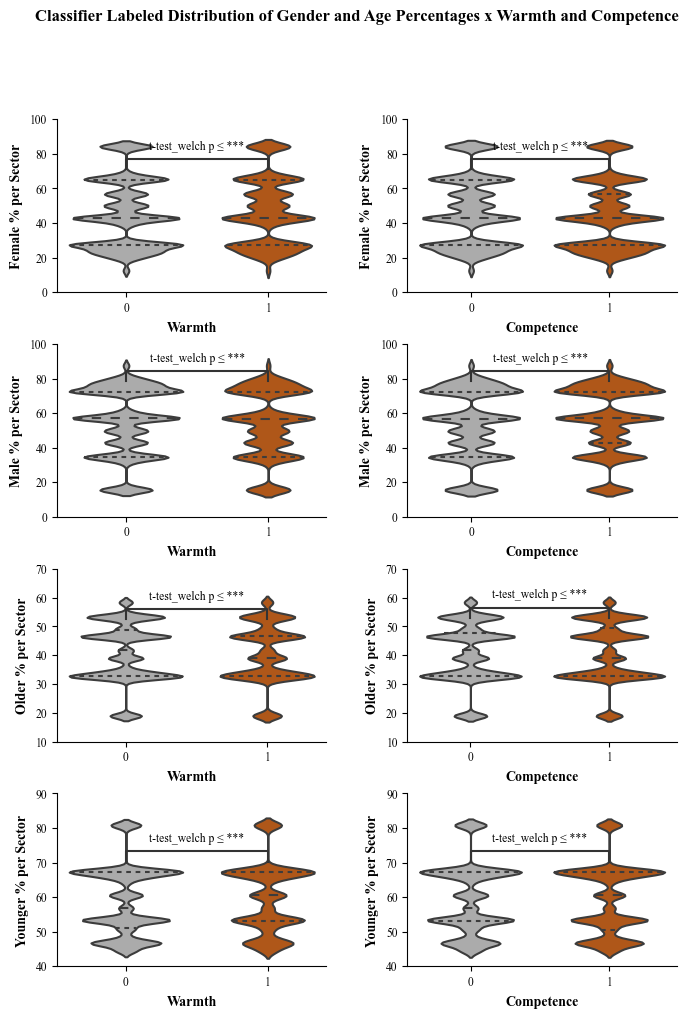

CPU times: user 43.7 s, sys: 5.3 s, total: 49 s
Wall time: 28.4 s


In [36]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_violinplots_reversed_interact(df_name):
        plot_violinplots_reversed(df_name, dataframes[df_name])
else:
    plot_violinplots_reversed(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


## Controls

In [37]:
def plot_correlation_controls(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    considered_features = ivs_dummy_and_perc + controls[:1]
    # HACK
    print(f'{considered_features=}')
    cont_controls = df[considered_features]
    mask = np.triu(np.ones_like(cont_controls.corr(), dtype=bool))
    correlation_matrix = sns.heatmap(cont_controls.corr().round(3), mask=mask, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize":7}, cmap=plt.cm.Grays)

    # Fix xticklabels and yticklabels
    correlation_matrix.set_xticklabels(
        labels=[
            ' '.join(xticklabel.get_text().split('_'))
            if '_' in xticklabel.get_text()
            else xticklabel.get_text()
            for xticklabel in correlation_matrix.get_xticklabels()
        ],
        rotation=45,
        horizontalalignment='right',
    )
    correlation_matrix.set_yticklabels(
        labels=[
            ' '.join(yticklabel.get_text().split('_'))
            if '_' in yticklabel.get_text()
            else yticklabel.get_text()
            for yticklabel in correlation_matrix.get_yticklabels()
        ],
    )

    plt.title("Predictors Correlation: Pearson's R Coefficients Heatmap")

    fig = plt.gcf()
    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f"{plot_save_path}{df_name} - Predictors Correlation Pearson's R Coefficients Heatmap.{image_save_format}"),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

considered_features=['Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Gender_Female_% per Sector', 'Gender_Male_% per Sector', 'Age_Older', 'Age_Mixed', 'Age_Younger', 'Age_Older_% per Sector', 'Age_Younger_% per Sector', 'Job Description spacy_sentencized_num_words']


100%|██████████| 2/2 [00:27<00:00, 13.95s/it]


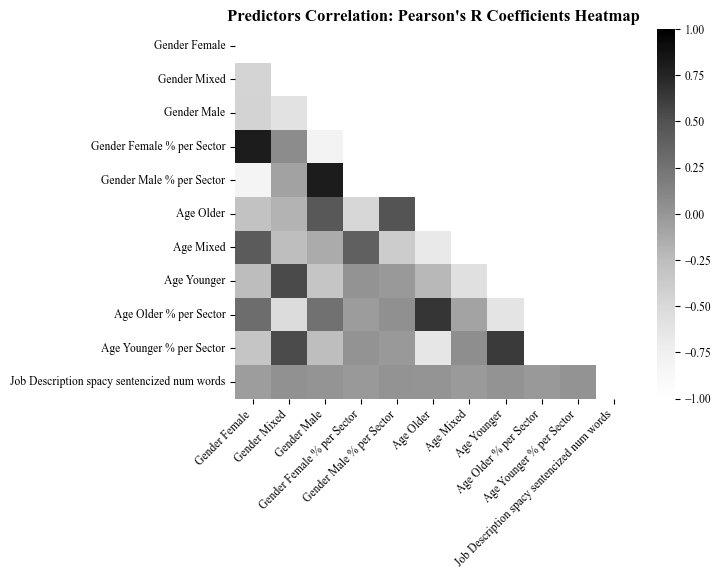

CPU times: user 26.1 s, sys: 1.39 s, total: 27.5 s
Wall time: 28.3 s


In [38]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_correlation_controls_interact(df_name):
        plot_correlation_controls(df_name, dataframes[df_name])
else:
    plot_correlation_controls(df_name, dataframes[df_name])


## Platform

++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:19<00:00,  9.90s/it]


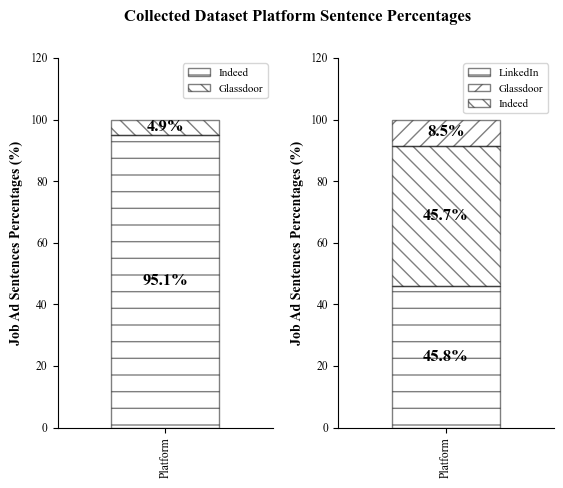

In [39]:
# Ploting Categorical Gender and Age
close_plots(plt)
color_dict = {
    'LinkedIn': 'C5', 'Glassdoor': 'C2', 'Indeed': 'C0',
}
for df_name, df in dataframes.items():
    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Collected Dataset'

fig, axs = plt.subplots(1, 2)
fig.suptitle(f'{title_prefix} Platform Sentence Percentages')

# df_manual
df_manual_platform_transposed = df_manual['Platform'].value_counts(normalize=True).mul(100).round(3).astype(float).to_frame().transpose().set_index(pd.Index(['Platform']))
df_manual_platform_colors = [color_dict[col] for col in df_manual_platform_transposed.columns]
df_manual_platform_transposed.plot(
    kind='bar', legend=True, stacked=True, ax=axs[0], fill=False, # color=df_manual_platform_colors
)

# df_jobs
df_jobs_platform_transposed = df_jobs['Platform'].value_counts(normalize=True).mul(100).round(3).astype(float).to_frame().transpose().set_index(pd.Index(['Platform']))
df_jobs_platform_colors = [color_dict[col] for col in df_jobs_platform_transposed.columns]
df_jobs_platform_transposed.plot(
    kind='bar', legend=True, stacked=True, ax=axs[1], fill=False #color=df_jobs_platform_colors
)
for ax in axs:
    ax.set_ylabel('Job Ad Sentences Percentages (%)')
    for i, container in enumerate(ax.containers):
        hatch_patterns = ['-', '\\\\', '//']
        labels = [f'{height:.1f}%' for v in container if float(height:= v.get_height())]
        ax.bar_label(container, labels=labels, label_type='center', color='black', weight='bold', fontsize=12)
        for bar in container:
            bar.set_hatch(hatch_patterns[i])
            bar.set_alpha(0.5)

# Set Legend
## df_manual
handles, labels = axs[0].get_legend_handles_labels()
axs[0] = axs[0].legend(handles=[handles[idx] for idx in [0, 1]], labels=[labels[idx] for idx in [0, 1]], loc='upper right', fontsize=8)
## df_jobs
handles, labels = axs[1].get_legend_handles_labels()
axs[1] = axs[1].legend(handles=[handles[idx] for idx in [0, 2, 1]], labels=[labels[idx] for idx in [0, 2, 1]], loc='upper right', fontsize=8)

for image_save_format in tqdm.tqdm(['png', 'svg']):
    fig.savefig(
        shorten_file_path(f'{plot_save_path}{df_name} - Platform Categorical Gender and Age Sentences.{image_save_format}'),
        format=image_save_format, dpi=3000, bbox_inches='tight'
    )
show_and_close_plots(plt)


In [40]:
# Make stacked barplots with percentages
def make_stacked_barplot(df, df_name, dvs):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    iv = 'Platform'
    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Warmth and Competence Sentence Percentages per {iv}')

    try:
        vars_list = [iv, *dvs]
        df_pivot = df[
            vars_list
        ].pivot_table(
            index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
        )
    except KeyError:
        from setup_module.imports import dvs
        vars_list = [iv, *dvs]
        df_pivot = df[
            vars_list
        ].pivot_table(
            index=iv, values=dvs, fill_value=0, aggfunc=lambda x: (100*x.sum())/len(df)
        )

    df_pivot.sort_values(by=iv, ascending=False).plot(
        kind='barh', legend=True, stacked=True, ax=ax, fill=False, #color=['C0', 'C5']
    )

    ax.legend(dvs)

    for i, container in enumerate(ax.containers):
        labels = [f'{width:.1f}%' for v in container if float(width:= v.get_width())]
        if iv != 'Sector':
            ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=12, weight='bold')
        ax.set_xlabel('Job Ad Sentences Percentages (%)')
        ax.set_ylabel(iv)
        ax.legend(loc='upper right', fontsize=12)
        for bar in container:
            bar.set_hatch('\\' if i % 2 == 0 else '//')
            bar.set_alpha(0.5)

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Platform Barplot - {iv} x {dvs[0]} and {dvs[1]} Sentences.{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:17<00:00,  8.93s/it]


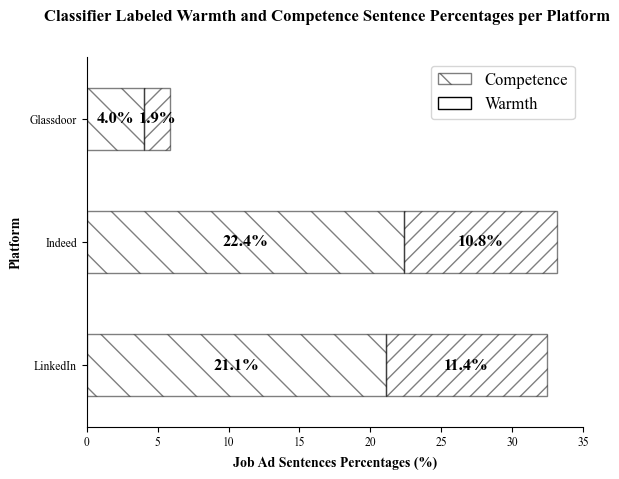

CPU times: user 17 s, sys: 855 ms, total: 17.9 s
Wall time: 18 s


In [41]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_stacked_barplot_interact(df_name):
        make_stacked_barplot(dataframes[df_name], df_name, dvs)
else:
    make_stacked_barplot(dataframes[list(dataframes.keys())[0]], list(dataframes.keys())[0], dvs)


In [42]:
# Make line plots 2 ax
def plot_lineplots_2ax(df_name, df, colors_dict=None,linestyle_dict=None):
    close_plots(plt)
    if colors_dict is None:
        colors_dict = {
            'Warmth': 'C5',
            'Competence': 'C0',
            'Warmth_Probability': 'C5',
            'Competence_Probability': 'C0',
        }
    if linestyle_dict is None:
        linestyle_dict = {
            'Warmth': '-',
            'Competence': '--',
            'Warmth_Probability': '-',
            'Competence_Probability': '--',
        }

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled Probabilities of'

    iv = 'Platform'
    fig, ax = plt.subplots()
    fig.suptitle(f'{title_prefix} Warmth and Competence x {iv}')

    if df_name == 'df_manual':
        for dv in dvs_all[:2]:
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ = {
                'data': data,
                # 'color': colors_dict[dv],
                'color': 'black',
                'linestyle': linestyle_dict[dv],
                'marker': 'o',
                'ax': ax,
            }
            line_plot = sns.lineplot(**params)
            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=9, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Scores')
    elif df_name == 'df_jobs':
        for dv in dvs_all[2:]:
            data = df.groupby(iv)[dv].agg('mean').astype(float)
            params = params_ = {
                'data': data,
                # 'color': colors_dict[dv],
                'color': 'black',
                'linestyle': linestyle_dict[dv],
                'marker': 'o',
                'ax': ax,
            }
            line_plot = sns.lineplot(**params)

            # Set labels and legend
            for var_name, var_value in zip(data.index.tolist(), data.values.tolist()):
                offset = (0, var_value + var_value/30)
                line_plot.annotate(
                    f'{var_value:.2f}',
                    xy=(var_name, var_value),
                    fontsize=9, ha='center', va='bottom',
                    xytext=offset, textcoords='offset points'
                )
            line_plot.set_ylabel('Scores')

    # Set Legend
    handles = [mpl.lines.Line2D(
        [], [], linestyle=linestyle_dict[dv], color='black', #color=colors_dict[dv],
    ) for dv in  dvs_all[:2]]
    fig.legend(handles=handles, labels=dvs, fontsize=10, bbox_to_anchor=(1, 0.95))

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            f'{plot_save_path}{df_name} - {title_prefix} Platform Line Plot (2 ax).{image_save_format}',
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++



100%|██████████| 2/2 [00:16<00:00,  8.01s/it]

CPU times: user 16.3 s, sys: 593 ms, total: 16.9 s
Wall time: 16.1 s


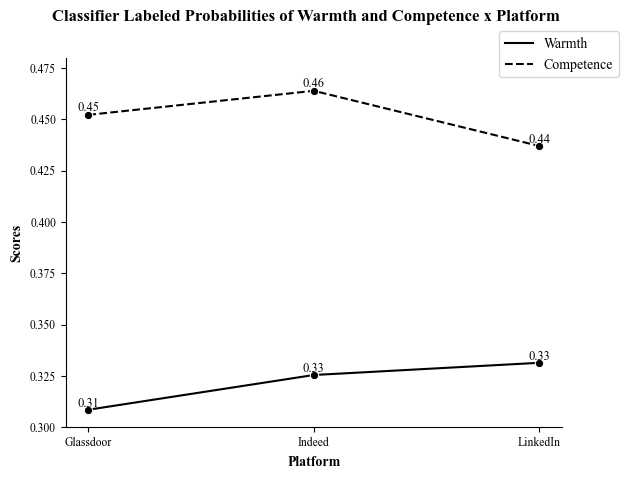

In [43]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_lineplots_2ax_interact(df_name):
        plot_lineplots_2ax(df_name, dataframes[df_name])
else:
    plot_lineplots_2ax(list(dataframes.keys())[0], list(dataframes.values())[0])


In [44]:
# Make violin plots
def plot_violinplots_2ax(df_name, df):
    close_plots(plt)

    print(f'{"+"*20} {df_name.upper()} {"+"*20}\n')

    if df_name == 'df_manual':
        title_prefix = 'Manually Annotated Dataset'
    elif df_name == 'df_jobs':
        title_prefix = 'Classifier Labeled'

    iv = 'Platform'
    fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
    fig.suptitle(f'{title_prefix} Distribution of Warmth and Competence x {iv}')

    pallette = ['C5', 'C2', 'C0']
    params_ = {
        'data': df,
        'palette': pallette,
        'inner': 'quartile'
    }
    configs = {
        'test': 't-test_welch',
        'comparisons_correction': 'Bonferroni',
        'test_short_name': True,
        'pvalue_thresholds': [(0.001, '***'), (0.01, '**'), (0.05, '*')],
        'correction_format': 'replace',
        'loc': 'inside',
        'show_test_name': True,
        'text_format': 'simple',
        'verbose': 2,
        'fontsize': 'small',
        'line_height': 0.06,
        'text_offset': 5,
    }

    if df_name == 'df_manual':
        for dv in dvs_all[:2]:
            pairs = [
                platform
                for platform in itertools.product(df[iv].unique(), df[iv].unique())
                if platform[0] != platform[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    0 if dv == dvs_all[0] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})

            }
            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()
    elif df_name == 'df_jobs':
        for dv in dvs_all[2:]:
            pairs = [
                platform
                for platform in itertools.product(df[iv].unique(), df[iv].unique())
                if platform[0] != platform[1]
            ]
            params = params_ | {
                'x': iv,
                'y': dv,
                'ax': axs[
                    0 if dv == dvs_all[2] else 1,
                ],
                'pairs': list({*map(tuple, map(sorted, pairs))})
            }
            violin_plot = sns.violinplot(**params)
            violin_plot.set_ylabel(' '.join(dv.split('_')) if '_' in dv else dv)
            annotator = Annotator(**params)
            annotator.configure(**configs)
            annotator.apply_and_annotate()

    for image_save_format in tqdm.tqdm(['png', 'svg']):
        fig.savefig(
            shorten_file_path(f'{plot_save_path}{df_name} - {title_prefix} Platform Violin Plot.{image_save_format}'),
            format=image_save_format, dpi=3000, bbox_inches='tight'
        )
    show_and_close_plots(plt)


++++++++++++++++++++ DF_JOBS ++++++++++++++++++++

Indeed vs. LinkedIn: Welch's t-test independent samples with Bonferroni correction, P_val:4.988e-05 t=-4.306e+00
LinkedIn vs. Glassdoor: Welch's t-test independent samples with Bonferroni correction, P_val:1.226e-20 t=9.436e+00
Indeed vs. Glassdoor: Welch's t-test independent samples with Bonferroni correction, P_val:8.304e-12 t=6.991e+00
Indeed vs. LinkedIn: Welch's t-test independent samples with Bonferroni correction, P_val:4.533e-79 t=1.889e+01
LinkedIn vs. Glassdoor: Welch's t-test independent samples with Bonferroni correction, P_val:8.056e-09 t=-5.951e+00
Indeed vs. Glassdoor: Welch's t-test independent samples with Bonferroni correction, P_val:1.327e-05 t=4.591e+00


100%|██████████| 2/2 [00:08<00:00,  4.46s/it]


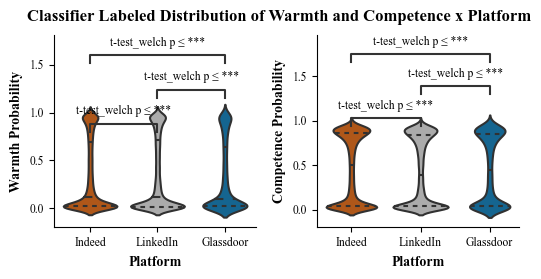

CPU times: user 15.6 s, sys: 2.82 s, total: 18.4 s
Wall time: 10.6 s


In [45]:
%%time
if len(dataframes) > 1:
    @interact(df_name=dataframes.keys())
    def plot_violinplots_2ax_interact(df_name):
        plot_violinplots_2ax(df_name, dataframes[df_name])
else:
    plot_violinplots_2ax(list(dataframes.keys())[0], dataframes[list(dataframes.keys())[0]])


#### Robustness check with R ggstatsplot

In [ ]:
# %load_ext rpy2.ipython
# %R require(ggstatsplot)
# %R require(glue)

# os.environ['R_HOME'] = '/opt/homebrew/Caskroom/miniforge/base/envs/Automating_Equity1/bin/R'
# import rpy2.robjects as robjects
# import rpy2.robjects.packages as rpackages
# from rpy2.ipython.ggplot import image_png
# import rpy2.robjects.lib.ggplot2 as ggplot2

# # Enable html printing
# rpy2.ipython.html.init_printing()

# # Set utils and base
# utils = importr('utils')
# base = importr('base')

# # Set CRAN mirror
# utils.chooseCRANmirror(ind=56)

# # Install packages
# packages = [
#     'ggplot2', 'ggstatsplot', 'glue', 'tidyverse', 'janitor', 'lme4', 'lmeInfo', 'broom', 'performance'
# ]
# utils.install_packages(StrVector(packages))

# # Import packages
# ggstatsplot = importr('ggstatsplot')
# ggplot2 = importr('ggplot2')
# glue = importr('glue')
# tidyverse = importr('tidyverse')
# janitor = importr('janitor')
# lme4 = importr('lme4')
# lmeInfo = importr('lmeInfo')
# broom = importr('broom')
# performance = importr('performance')


In [47]:
# %%R -i df_manual,df_jobs,dvs,dvs_prob,dvs_all,ivs,ivs_dummy,ivs_perc,ivs_dummy_and_perc,ivs_all,colorblind_hex_colors -w 5 -h 5 --units in -r 200

# # Set CRAN mirror to Netherlands
# chooseCRANmirror(ind=56)

# # Install packages
# install.packages('ggplot2')
# install.packages('ggstatsplot')
# install.packages('glue')

# # Load libraries
# if (!require(ggstatsplot)) {
#   install.packages("ggstatsplot", repos = "https://cloud.r-project.org")
# }
# library(ggstatsplot)

# data = df_manual

# # Set colors
# cbPalette <- colorblind_hex_colors
# scale_fill_manual(values=cbPalette)
# scale_colour_manual(values=cbPalette)

# ## Function to perform analysis
# analysis_func <- function(df, iv, dv){
#   strrep("=",80)
#   print(glue('Analyzing {df_name}'))
#   strrep("-",20)
#   print(glue('{iv} x {dv}'))
#   strrep("-",20)
#   ## Levene's Test
#   lev = leveneTest(data = df, data[[dv]] ~ data[[iv]])

#   if (lev["group", 3] <= 0.05){
#       lev_not_sig = FALSE
#       print(glue("Levene's test is NOT significant at {lev['group', 3]}"))
#       } else if (lev["group", 3] >= 0.05){
#       lev_not_sig = TRUE
#       print(glue("Levene's test is significant at {lev['group', 3]}"))
#   }

#   ## One-way Welch's ANOVA
#   strrep("-",20)
#   print(glue("One-way Welch's ANOVA for {iv} x {dv}"))
#   strrep("-",20)
#   one_way <-
#       aov(data[[dv]] ~ as.factor(data[[iv]]),
#           data = df,
#           var.equal = lev_not_sig)
#   anova(one_way)
#   res <- gamesHowellTest(one_way)
#   summaryGroup(res)
#   summary(res)

#   ## OLS Regression
#   strrep("-",20)
#   print(glue('Regression for {iv} x {dv}'))
#   strrep("-",20)
#   lm <- lm(data[[dv]] ~ as.factor(data[[iv]]), data = df)
#   summ(lm)
#   summary(lm)$coef
#   par(mfrow = c(2, 2))
#   plot(lm)
#   return(lev_not_sig)
#   strrep("=",80)

# }

# for (iv in ivs_dummy){
#   for (dv in dvs_prob){
#     lev_not_sig <- analysis_func(df = data,
#                                  iv = iv,
#                                  dv = dv)
#     vplot <- ggbetweenstats(
#       data = data,
#       x = data[[iv]],
#       y = data[[dv]],
#       type = "parametric",
#       conf.level = 0.95,
#       plot.type = "boxviolin",
#       mean.plotting = TRUE,
#       outlier.tagging = TRUE,
#       outlier.coef = 1.5,
#       outlier.label = region,
#       outlier.label.color = "red",
#       sphericity.correction = TRUE,
#       p.adjust.method = "bonferroni",
#       pairwise.comparisons = TRUE,
#       pairwise.display = "significant",
#       centrality.plotting = TRUE,
#       centrality.path = TRUE,
#       centrality.type = "parameteric",
#       bf.message = TRUE,
#     )

#     vplot <- ggbetweenstats(
#       data = data,
#       x = data[[iv]],
#       y = data[[dv]],
#       xlab = glue("{iv} segregated sectors"),
#       ylab = glue("Presence of {dv}-related frames"),
#       type = "parametric",
#       conf.level = 0.95,
#       # ANOVA or Kruskal-Wallis
#       var.equal = lev_not_sig,
#       # ANOVA or Welch ANOVA
#       plot.type = "boxviolin",
#       mean.plotting = TRUE,
#       outlier.tagging = TRUE,
#       outlier.coef = 1.5,
#       outlier.label = region,
#       outlier.label.color = "red",
#       sphericity.correction = TRUE,
#       p.adjust.method = "bonferroni",
#       pairwise.comparisons = TRUE,
#       pairwise.display = "significant",
#       centrality.plotting = TRUE,
#       centrality.path = TRUE,
#       centrality.type = "parameteric",
#       bf.message = TRUE,
#       title = glue("Violin plot of {dv}-related frames in job ads from {iv} segregated sectors"),
#       caption = glue("{dv}-{iv} Violin plot ")
#     )
#     print(vplot)

#     # #### Save violin plot
#     # ggplot2::ggsave(
#     #     filename = glue("{plot_save_path}Violinplot {df_name} - {iv} x {dv}.png"),
#     #     plot = vplot,
#     #     device = "png",
#     #     dpi = 1200,
#     #     width = 15,
#     #     height = 10,
#     #     units = "cm"
#     # )
#   }
# }
